<a href="https://colab.research.google.com/github/PanduDLaksono/PVCK_Genap_2021/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library

import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#fungsi Konvolusi

def konvolusi(image, kernel, stride, padding):

  # Menambahkan padding
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # mengambil width dan height dari gambar dan juga padding
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  out_height = (padded_height - kernel_height) // stride + 1
  out_width = (padded_width - kernel_width) // stride + 1

  image_1 = np.zeros((out_height, out_width)).astype(np.float32)

  # proses konvolusi
  for y in range(0, out_height):
    for x in range(0, out_width):
      image_1[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return image_1

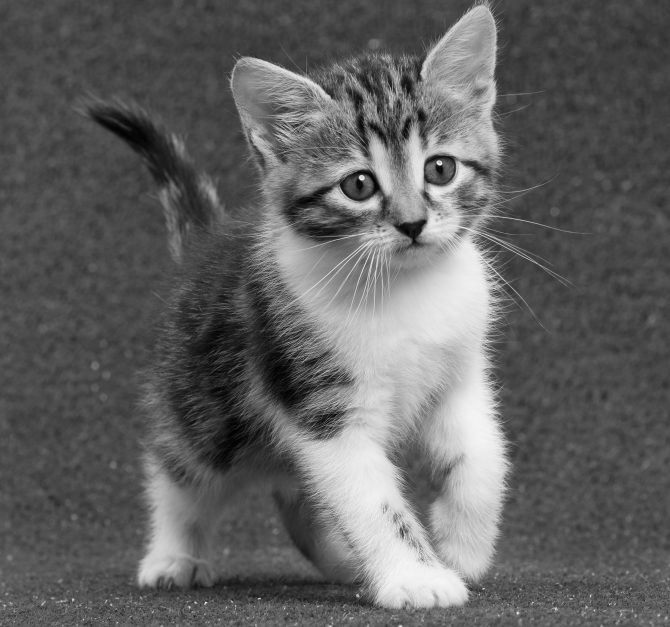

In [4]:
#membuat citra menjadi greyscale

img = cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/kitten01.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

In [6]:
# Membuat kernel sesuai filter

# image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
# emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])


# left sobel edge detection
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])


# canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])


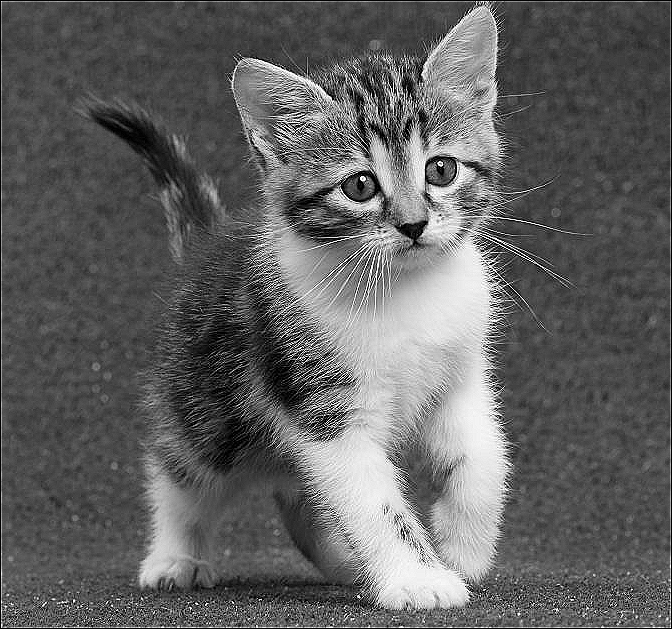

In [7]:
#Filter Sharpen

cv2_imshow(konvolusi(img_gray,kernel_sharpen,1,2))

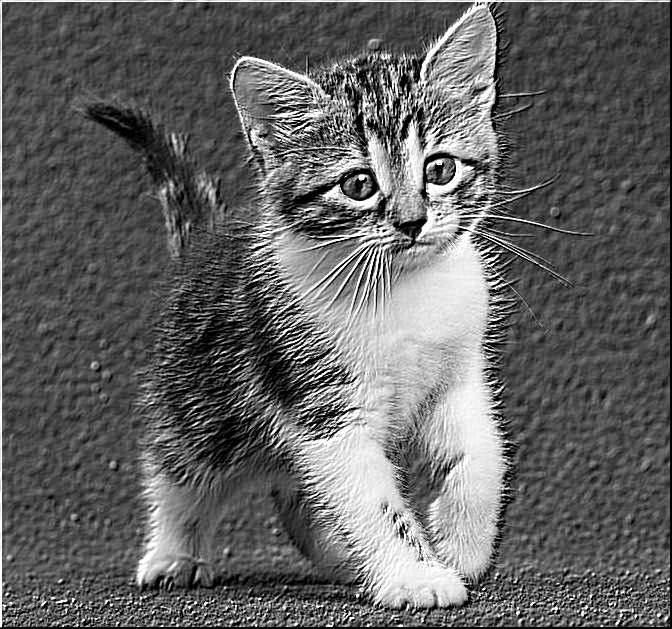

In [8]:
#Filter Emboss

cv2_imshow(konvolusi(img_gray,kernel_emboss,1,2))

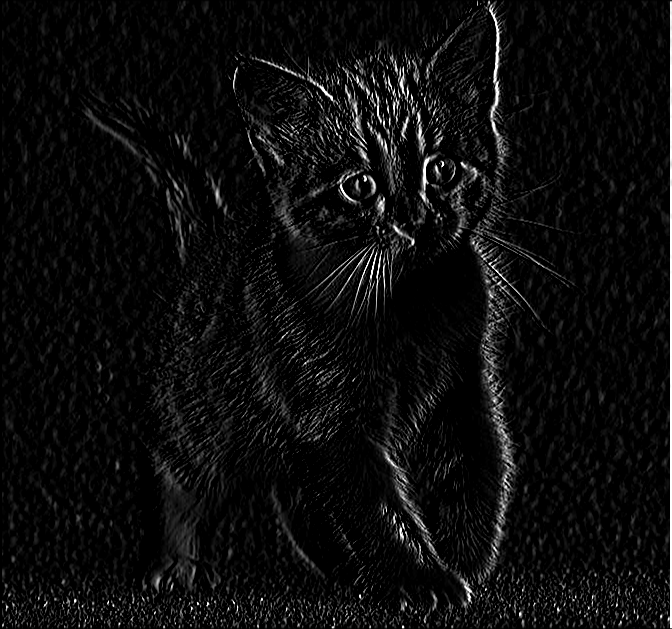

In [9]:
# Left Sobel Edge Detection

cv2_imshow(konvolusi(img_gray,kernel_sobel,1,2))

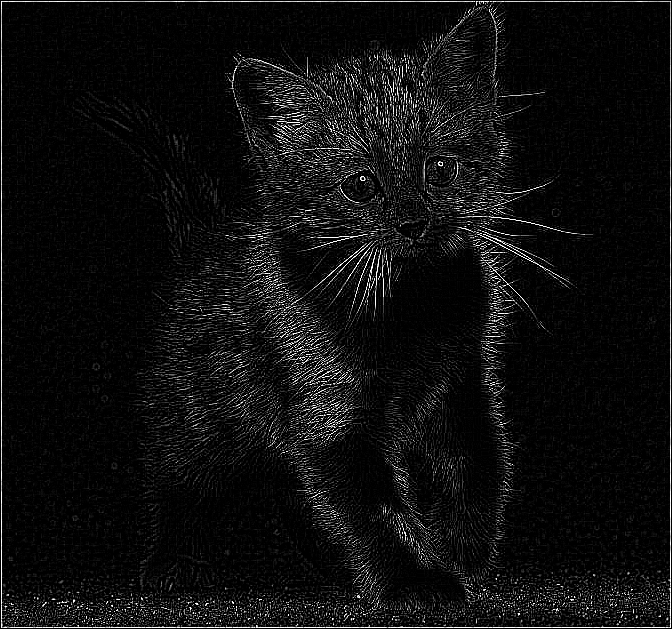

In [10]:
# Canny Edge Detection

cv2_imshow(konvolusi(img_gray,kernel_canny,1,2))

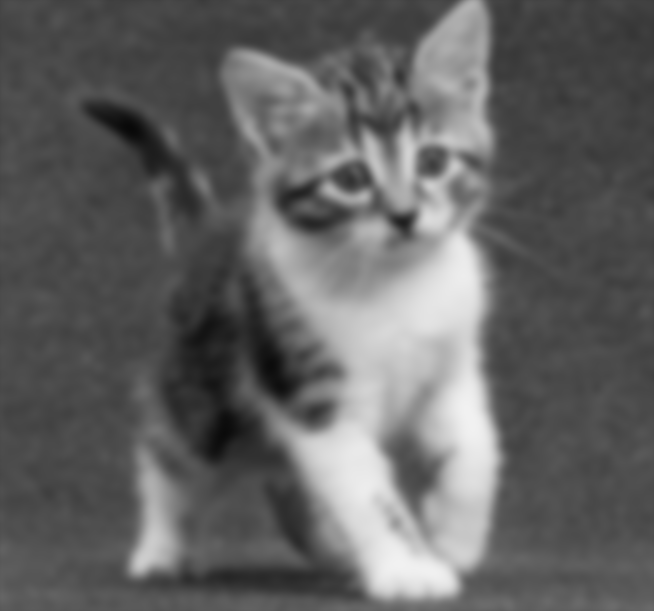

In [12]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(konvolusi(img_gray,gauss_kernel,1,2))